##### Hello! In this notebook I plan to see how much the rain affects fremont bike traffic! 
##### i got the rain data from here -> https://www.ncdc.noaa.gov/cdo-web/search
##### and the fremont bike data from here -> https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### currnet weather frame only goes to 2019
#rain_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Rain In Fremont.csv', parse_dates=[5])
rain_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Seattle_MultiStation_Weather.csv', parse_dates=[5])
bike_data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Fremont_Bridge_Bicycle_Counter_20231106.csv', parse_dates=[0])

bike_data_frame.head()



,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0


In [2]:
## doing this line for groupb purposes
bike_data_frame['Date_Only'] = bike_data_frame['Date'].dt.date

In [3]:
#### aggregate (Smush rows) of  both frames!

rain_aggregation_functions = {'STATION':'first','NAME':'first','LATITUDE':'first','LONGITUDE':'first','ELEVATION':'first','DAPR':'mean','MDPR':'mean','PRCP':'mean','SNOW':'mean','SNWD':'mean','WESD':'mean', 'WESF':'mean'}

combined_rain_frame = rain_data_frame.groupby('DATE').aggregate(rain_aggregation_functions).reset_index()

bike_aggregation_functions = {'Date':'first','Fremont Bridge Sidewalks, south of N 34th St':'sum','Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk':'sum','Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk':'sum'}

combined_bike_frame = bike_data_frame.groupby('Date_Only').aggregate(bike_aggregation_functions).reset_index()

In [4]:
##### add day month and year columns for ease

#rain_data_frame['DAY'] = rain_data_frame['DATE'].iloc[:2]

combined_rain_frame['DAY'] = combined_rain_frame['DATE'].dt.day
combined_rain_frame['MONTH'] = combined_rain_frame['DATE'].dt.month
combined_rain_frame['YEAR'] = combined_rain_frame['DATE'].dt.year
combined_rain_frame['WEEK_NUM'] = combined_rain_frame['DATE'].dt.isocalendar().week
#rain_data_frame['DAY_OF_YEAR'] = rain_data_frame['DATE'].dt.timetuple().tm_yday

combined_bike_frame['Day'] = combined_bike_frame['Date'].dt.day
combined_bike_frame['Month'] = combined_bike_frame['Date'].dt.month
combined_bike_frame['Year'] = combined_bike_frame['Date'].dt.year
combined_bike_frame['Time'] = combined_bike_frame['Date'].dt.time
combined_bike_frame['Date_Only'] = combined_bike_frame['Date'].dt.date
combined_bike_frame['Week_Num'] = combined_bike_frame['Date'].dt.isocalendar().week
#bike_data_frame['Day_Of_Year'] = bike_data_frame['DATE'].dt.timetuple().tm_yday


#print (datestr.iloc[:3])

In [5]:
#print (rain_data_frame.info())
combined_rain_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       3723 non-null   datetime64[ns]
 1   STATION    3723 non-null   object        
 2   NAME       3723 non-null   object        
 3   LATITUDE   3723 non-null   float64       
 4   LONGITUDE  3723 non-null   float64       
 5   ELEVATION  3723 non-null   float64       
 6   DAPR       354 non-null    float64       
 7   MDPR       352 non-null    float64       
 8   PRCP       3687 non-null   float64       
 9   SNOW       1881 non-null   float64       
 10  SNWD       50 non-null     float64       
 11  WESD       25 non-null     float64       
 12  WESF       22 non-null     float64       
 13  DAY        3723 non-null   int64         
 14  MONTH      3723 non-null   int64         
 15  YEAR       3723 non-null   int64         
 16  WEEK_NUM   3723 non-null   UInt32        


In [6]:
combined_rain_frame.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF,DAY,MONTH,YEAR,WEEK_NUM
0,2013-03-14,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.170,NaN,NaN,NaN,NaN,14,3,2013,11
1,2013-03-15,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.030,NaN,NaN,NaN,NaN,15,3,2013,11
2,2013-03-16,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.000,NaN,NaN,NaN,NaN,16,3,2013,11
3,2013-03-17,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.035,NaN,NaN,NaN,NaN,17,3,2013,11
4,2013-03-18,US1WAKG0188,"SEATTLE 3.3 N, WA US",47.6701,-122.3546,107.6,NaN,NaN,0.060,0.0,NaN,NaN,NaN,18,3,2013,12


In [7]:
combined_bike_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           3985 non-null   object        
 1   Date                                                                3985 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        3985 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  3985 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  3985 non-null   float64       
 5   Day                                                                 3985 non-null   int64         
 6   Month                                                   

In [8]:
combined_bike_frame.head()

,Date_Only,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk",Day,Month,Year,Time,Week_Num
0,2012-10-03,2012-10-03,3521.0,1760.0,1761.0,3,10,2012,00:00:00,40
1,2012-10-04,2012-10-04,3475.0,1708.0,1767.0,4,10,2012,00:00:00,40
2,2012-10-05,2012-10-05,3148.0,1558.0,1590.0,5,10,2012,00:00:00,40
3,2012-10-06,2012-10-06,2006.0,1080.0,926.0,6,10,2012,00:00:00,40
4,2012-10-07,2012-10-07,2142.0,1191.0,951.0,7,10,2012,00:00:00,40


In [9]:
### Merge the frames!!
combined_data_frame = pd.merge(left = combined_bike_frame, right = combined_rain_frame, left_on = 'Date', right_on = 'DATE', how = 'inner')

In [10]:
combined_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 3656
Data columns (total 27 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date_Only                                                           3657 non-null   object        
 1   Date                                                                3657 non-null   datetime64[ns]
 2   Fremont Bridge Sidewalks, south of N 34th St                        3657 non-null   float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  3657 non-null   float64       
 4   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  3657 non-null   float64       
 5   Day                                                                 3657 non-null   int64         
 6   Month                                                   

In [11]:
No_Rain_Mask = combined_data_frame['PRCP'] == 0
Yes_Rain_Mask = combined_data_frame['PRCP'] > 0
No_Rain_Frame = combined_data_frame[No_Rain_Mask]
Yes_Rain_Frame = combined_data_frame[Yes_Rain_Mask]

In [12]:
No_Rain_Frame['Fremont Bridge Sidewalks, south of N 34th St'].mean()

3140.6748768472908

In [13]:
Yes_Rain_Frame['Fremont Bridge Sidewalks, south of N 34th St'].mean()

2098.803803803804

<function matplotlib.pyplot.show(close=None, block=None)>

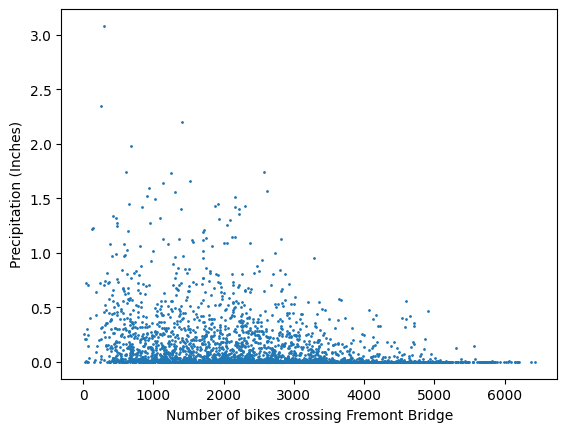

In [44]:
##plotting!!!


x = combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St']
y = combined_data_frame['PRCP']

plt.scatter(x, y, s = 1)
plt.xlabel('Number of bikes crossing Fremont Bridge')
plt.ylabel('Precipitation (Inches)')

plt.show

<Axes: title={'center': 'Number of bikes by precipitation'}, xlabel='PRCP'>

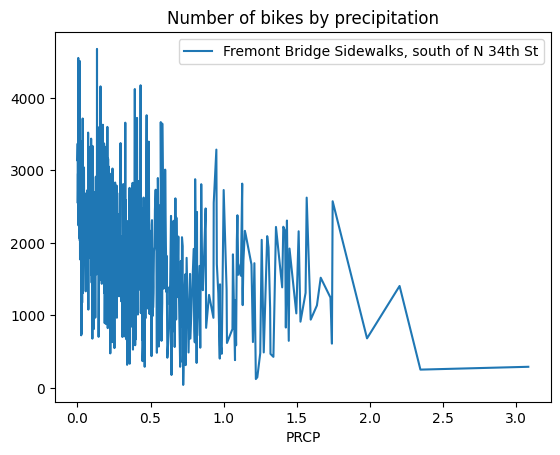

In [15]:
prcp_line = combined_data_frame.groupby('PRCP').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

prcp_line.plot(title = 'Number of bikes by precipitation')

#bins = pd.cut(combined_data_frame['PRCP'], bins = [-.5,0,0.5,1,1.5,2,2.5,3,3.5])
#plt.bar(bins,combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St'])

#plt.hist(y = combined_data_frame['Fremont Bridge Sidewalks, south of N 34th St'], bins = bins.astype(str))
#plt.show()

#bins.head()
#bins.info()

<Axes: title={'center': 'Number of bikes by precipitation, Rounded'}, xlabel='PRCP_ROUNDED'>

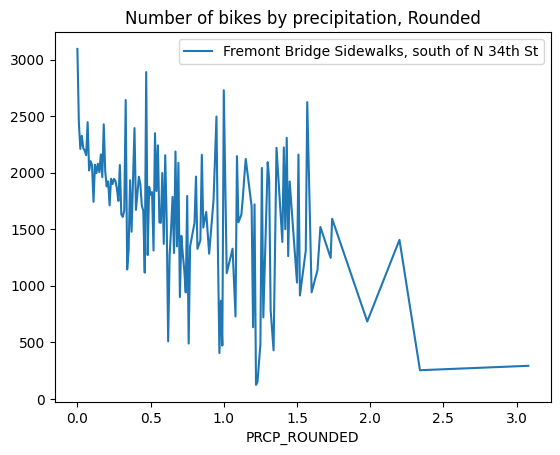

In [43]:
prcp_rounded = combined_data_frame['PRCP'].round(2)

combined_data_frame['PRCP_ROUNDED'] = prcp_rounded

prcp_rounded_line = combined_data_frame.groupby('PRCP_ROUNDED').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

prcp_rounded_line.plot(title = 'Number of bikes by precipitation, Rounded')

<Axes: title={'center': 'Number of bikes by snowfall'}, xlabel='SNOW'>

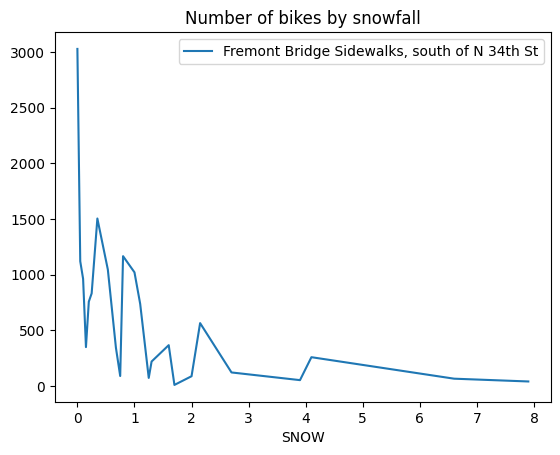

In [16]:
snow_line = combined_data_frame.groupby('SNOW').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'})

snow_line.plot(title = 'Number of bikes by snowfall')

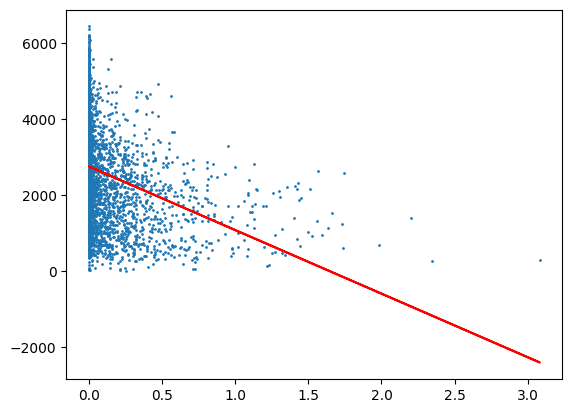

In [31]:
###make a new frame to remove all null PRCP values
nan_mask = combined_data_frame['PRCP'] >= 0
nan_removed = combined_data_frame[nan_mask]



Y = nan_removed[['Fremont Bridge Sidewalks, south of N 34th St']]
X = nan_removed[['PRCP']]


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)


plt.scatter(X, Y, s = 1)
plt.plot(X, Y_pred, color='red')
#plt.xlabel('Number of Bikers')
plt.show()
